In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7 ##

## Census ##

In [4]:
full = Table.read_table('../Datasets/nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [5]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2014')

# Make things easier to read
simple = partial.relabeled(2, '2010').relabeled(3, '2014')

# Remove the age totals
no_999 = simple.where('AGE', are.below(999))

# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')

everyone

AGE,2010,2014
0,3944153,3948350
1,3978070,3962123
2,4096929,3957772
3,4119040,4005190
4,4063170,4003448
5,4056858,4004858
6,4066381,4134352
7,4030579,4154000
8,4046486,4119524
9,4148353,4106832


## Line Plots ##

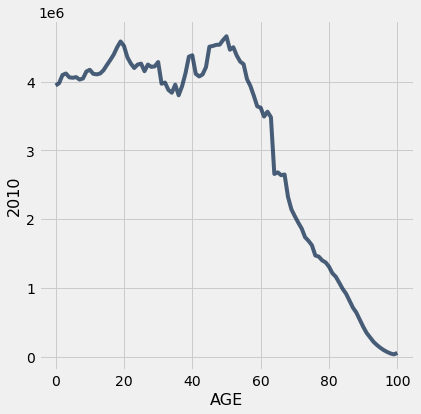

In [6]:
everyone.plot('AGE', '2010')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

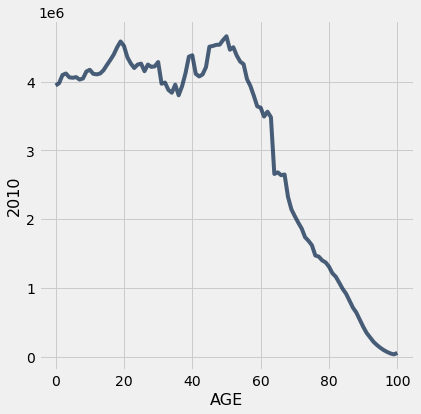

In [7]:
# US Population  <--- Just add a comment

everyone.plot('AGE', '2010')

US Population


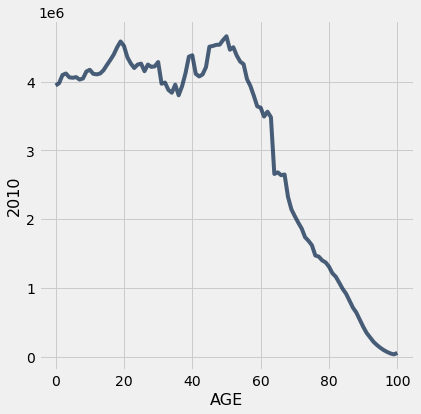

In [8]:
everyone.plot('AGE', '2010')
print('US Population')  # <--- Print out what it is

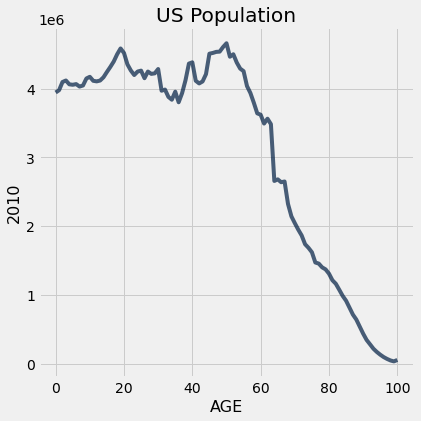

In [9]:
everyone.plot('AGE', '2010')
plots.title('US Population');

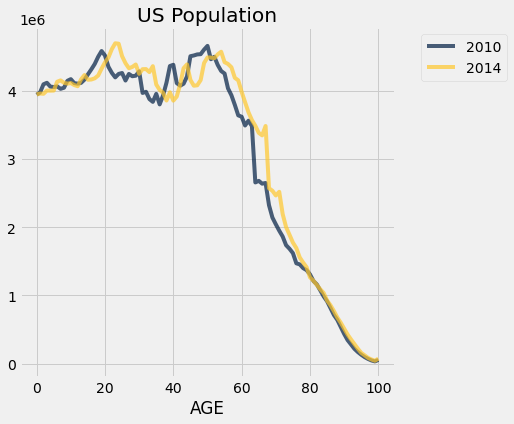

In [10]:
# Age distribution for two different years
everyone.plot('AGE')
plots.title('US Population'); 

## What proportion of each age group were female in 2010?

In [ ]:
uspop_mf_2010 = no_999.select('AGE','2010', 'SEX').where('SEX', are.above(0))
uspop_mf_2010

In [ ]:
females_uspop_2010 = uspop_mf_2010.where('SEX', are.equal_to(2)).drop('SEX').relabeled(1, 'females_2010')
males_uspop_2010 = uspop_mf_2010.where('SEX', are.equal_to(1)).drop('SEX').relabeled(1, 'males_2010')
females_uspop_2010.show(5)
males_uspop_2010.show(5)

In [ ]:
prop_female_uspop_2010 =  Table().with_column('Proportion Female', 
                                            females_uspop_2010.column('females_2010') / 
                                              (females_uspop_2010.column('females_2010') + males_uspop_2010.column('males_2010')))
prop_female_uspop_2010

In [ ]:
prop_female_uspop_2010 = prop_female_uspop_2010.with_column('AGE', females_uspop_2010.column('AGE'))
prop_female_uspop_2010

In [ ]:
prop_female_uspop_2010.plot('AGE', 'Proportion Female')
plots.title('Proportion of Female US Population by Age');

In [ ]:
prop_female_uspop_2010.plot('AGE', 'Proportion Female')
plots.title('Proportion of Female US Population by Age');
plots.ylim(0, 1);

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
insurance = Table.read_table('insurance_charges.csv')
insurance

In [ ]:
insurance.scatter('age', 'charges')

In [ ]:
insurance.scatter('bmi', 'charges')

In [ ]:
insurance.scatter('bmi', 'charges', group = 'smoker')

## Bar Charts ##

In [11]:
vgsales = Table.read_table('../Datasets/vgsales.csv')
vgsales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [12]:
top10_NA_Sales = vgsales.sort('NA_Sales', descending=True).take(np.arange(10))
top10_NA_Sales

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
6,Tetris,GB,1989,Puzzle,Nintendo,23.2,2.26,4.22,0.58,30.26
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.7,2.26,28.62
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02
19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


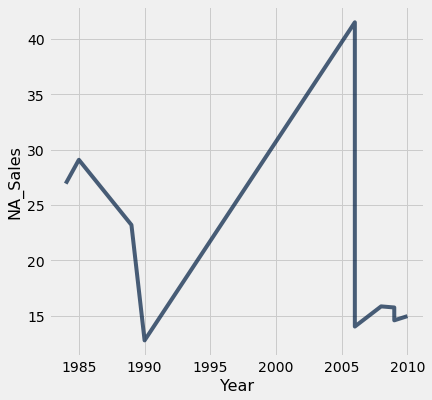

In [13]:
# A line plot doesn't make sense here: don't do this!
top10_NA_Sales.plot('Year', 'NA_Sales')

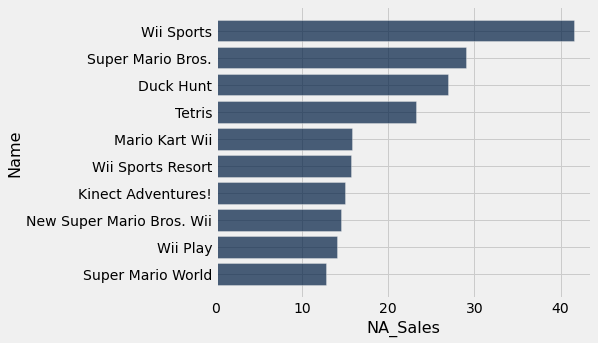

In [14]:
top10_NA_Sales.barh('Name', 'NA_Sales')

In [ ]:
# Generate the chart shown in the slides:
# bar chart of age (# years since release) for the 10 highest grossing global sales for Nintendo games